In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Merge_2017_clean.csv')

In [ ]:
#df = df.sample(10000)

In [3]:
df.shape

(2378453, 79)

In [5]:
#已经无空值
print(df[df.isnull().T.any()])

Empty DataFrame
Columns: [ Destination Port,  Flow Duration,  Total Fwd Packets,  Total Backward Packets, Total Length of Fwd Packets,  Total Length of Bwd Packets,  Fwd Packet Length Max,  Fwd Packet Length Min,  Fwd Packet Length Mean,  Fwd Packet Length Std, Bwd Packet Length Max,  Bwd Packet Length Min,  Bwd Packet Length Mean,  Bwd Packet Length Std, Flow Bytes/s,  Flow Packets/s,  Flow IAT Mean,  Flow IAT Std,  Flow IAT Max,  Flow IAT Min, Fwd IAT Total,  Fwd IAT Mean,  Fwd IAT Std,  Fwd IAT Max,  Fwd IAT Min, Bwd IAT Total,  Bwd IAT Mean,  Bwd IAT Std,  Bwd IAT Max,  Bwd IAT Min, Fwd PSH Flags,  Bwd PSH Flags,  Fwd URG Flags,  Bwd URG Flags,  Fwd Header Length,  Bwd Header Length, Fwd Packets/s,  Bwd Packets/s,  Min Packet Length,  Max Packet Length,  Packet Length Mean,  Packet Length Std,  Packet Length Variance, FIN Flag Count,  SYN Flag Count,  RST Flag Count,  PSH Flag Count,  ACK Flag Count,  URG Flag Count,  CWE Flag Count,  ECE Flag Count,  Down/Up Ratio,  Average Packet

In [4]:
counts = df.groupby(' Label').size()
counts

 Label
BENIGN                        1904157
Bot                              1956
DDoS                           128025
DoS Hulk                       158168
DoS Slowhttptest                 5499
DoS slowloris                    5796
FTP-Patator                      7935
Infiltration                       36
PortScan                       158804
SSH-Patator                      5897
Web Attack � Brute Force         1507
Web Attack � Sql Injection         21
Web Attack � XSS                  652
dtype: int64

**特征编码**

In [5]:
# 对Label进行编码
df[' Label'].replace(to_replace=['BENIGN',
                'PortScan',
                'DDoS',
                'DoS slowloris',
                'DoS Slowhttptest',
                'DoS Hulk',
                'DoS GoldenEye',
                'Heartbleed',
                'FTP-Patator',
                'SSH-Patator',
                'Web Attack � Brute Force',
                'Web Attack � XSS',
                'Web Attack � Sql Injection',
                'Infiltration',
                'Bot'], 
            value=[ 0
                    ,1
                    ,2
                    ,3
                    ,4
                    ,5
                    ,6
                    ,7
                    ,8
                    ,9
                    ,10
                    ,11
                    ,12
                    ,13
                    ,14],
            inplace=True)

In [6]:
counts = df.groupby(' Label').size()
counts

 Label
0     1904157
1      158804
2      128025
3        5796
4        5499
5      158168
8        7935
9        5897
10       1507
11        652
12         21
13         36
14       1956
dtype: int64

# **选出各种攻击**

## 箱线图分析不行

In [ ]:
# 指定列名称和目标字符串
column_name = ' Label'
#BENIGN_string == 0
# 选出包含目标字符串的所有行
#BENIGN_rows = df[df[column_name].int64.contains(0)]
# 选取某个列（例如第2列）并筛选出所有含有数字1的数据
BENIGN_rows = df[df.iloc[:, -1].astype(str).str.contains('0')]

In [ ]:
BENIGN_rows.shape

In [ ]:
#多了一个含有数字10
BENIGN_rows = BENIGN_rows[BENIGN_rows.iloc[:,-1] !=10]

In [ ]:
BENIGN_rows.shape

In [ ]:
counts = BENIGN_rows.groupby(' Label').size()
counts

## Bot_rows

In [30]:
# 指定列名称和目标字符串
column_name = ' Label'
#Bot_string = 'Bot'
# 选出包含目标字符串的所有行
#Bot_rows = df[df[column_name].str.contains(Bot_string)]
Bot_rows = df[df.iloc[:, -1].astype(str).str.contains('14')]

In [20]:
Bot_rows.shape

(1956, 79)

In [24]:
X_Bot_rows = Bot_rows.loc[:,Bot_rows.columns != " Label"]

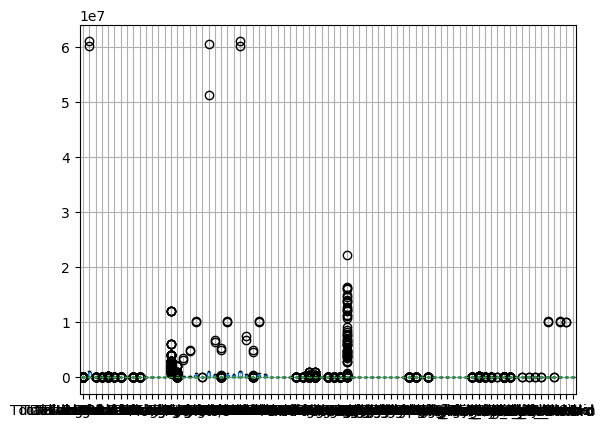

In [13]:
def boxfilter(data, proportion:float):
    allbox = data.boxplot(return_type='dict')
    zipped = zip(allbox['fliers'], data.columns)
    i = 0
    for flier, index_name in zipped:
        # 获取一个列的异常y值
        y = flier.get_ydata()
        # 获取数据长度
        datalenth = data.shape[0]
        # 如果有异常值才处理
        if(len(y) >= 1):
            #对于每一个异常值做处理
            for i in y:          
                #因为你不知道异常值是高于还是低于，因此这里做两次判断(异常值毕竟是少数)
                #如果留下来的数据规模是大于以前数据规模*proportion的，则进行处理，这个取决于你来定
                if(data[data[index_name] < i].shape[0] >=datalenth*proportion):
                    data = data[data[index_name] < i]
                elif(data[data[index_name] > i].shape[0] >= datalenth*proportion):
                    data = data[data[index_name] > i] 
    return data
newdata = boxfilter(Bot_rows,0.7)
#newdata.boxplot(return_type='dict')
#plt.savefig('种类数据筛选/Bot箱线图-1.png')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f18338fe8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f18338fef10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f18338fe1d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f18338d0ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f18338d0bd0>,
 'means': []}

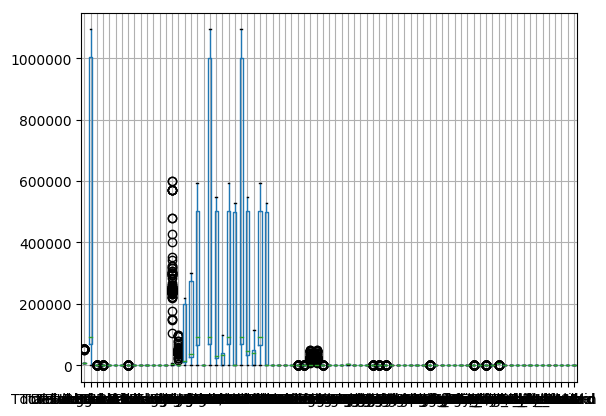

In [14]:
newdata.boxplot(return_type='dict')
#plt.savefig('种类数据筛选/Bot箱线图-2.png')

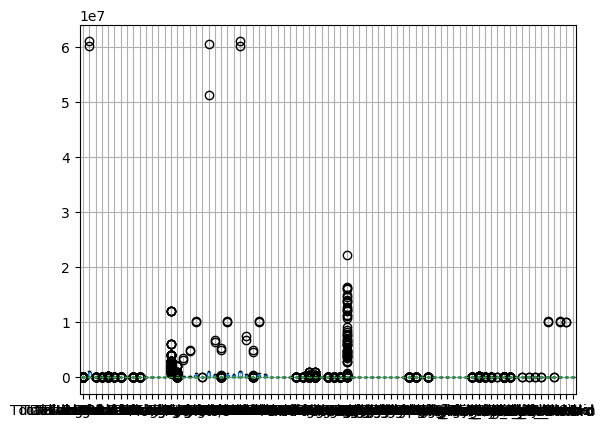

In [23]:
import matplotlib.pyplot as plt
Bot_rows.boxplot()
#plt.savefig('种类数据筛选/Bot箱线图.png')

In [ ]:
Bot_rows.drop(columns=[' Label'],inplace=True)

In [17]:
Bot_rows.shape

(1956, 79)

In [18]:
# 针对每一列删除异常值
for col in Bot_rows.columns:
    # 计算第一四分位数(Q1)、第三四分位数(Q3)和四分位距(IQR)
    Q1 = Bot_rows[col].quantile(0.25)
    Q3 = Bot_rows[col].quantile(0.75)
    IQR = Q3 - Q1

    # 计算上下限
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    # 删除异常值
    Bot_rows_clean = Bot_rows[(Bot_rows[col] > lower_limit) & (Bot_rows[col] < upper_limit)]

# 打印结果
print(Bot_rows_clean)


Empty DataFrame
Columns: [ Destination Port,  Flow Duration,  Total Fwd Packets,  Total Backward Packets, Total Length of Fwd Packets,  Total Length of Bwd Packets,  Fwd Packet Length Max,  Fwd Packet Length Min,  Fwd Packet Length Mean,  Fwd Packet Length Std, Bwd Packet Length Max,  Bwd Packet Length Min,  Bwd Packet Length Mean,  Bwd Packet Length Std, Flow Bytes/s,  Flow Packets/s,  Flow IAT Mean,  Flow IAT Std,  Flow IAT Max,  Flow IAT Min, Fwd IAT Total,  Fwd IAT Mean,  Fwd IAT Std,  Fwd IAT Max,  Fwd IAT Min, Bwd IAT Total,  Bwd IAT Mean,  Bwd IAT Std,  Bwd IAT Max,  Bwd IAT Min, Fwd PSH Flags,  Bwd PSH Flags,  Fwd URG Flags,  Bwd URG Flags,  Fwd Header Length,  Bwd Header Length, Fwd Packets/s,  Bwd Packets/s,  Min Packet Length,  Max Packet Length,  Packet Length Mean,  Packet Length Std,  Packet Length Variance, FIN Flag Count,  SYN Flag Count,  RST Flag Count,  PSH Flag Count,  ACK Flag Count,  URG Flag Count,  CWE Flag Count,  ECE Flag Count,  Down/Up Ratio,  Average Packet

## BENIGN_rows

In [19]:
import matplotlib.pyplot as plt
BENIGN_rows.boxplot()
#plt.savefig('种类数据筛选/BENIGN箱线图.png')

NameError: name 'BENIGN_rows' is not defined

**LocalOutlierFactor异常值筛选**

In [97]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(Bot_rows)

In [98]:
y_pred

array([-1, -1,  1, ..., -1,  1,  1])

In [99]:
#统计数组分类
from collections import Counter
counts = Counter(y_pred)
# 输出每个分类及其对应的数量
for Class, count in counts.items():
    print(Class, count)  

-1 283
1 1673


In [100]:
#数据筛选
Bot_rows_clean = Bot_rows[y_pred == 1] 

In [101]:
Bot_rows_clean.shape

(1673, 79)

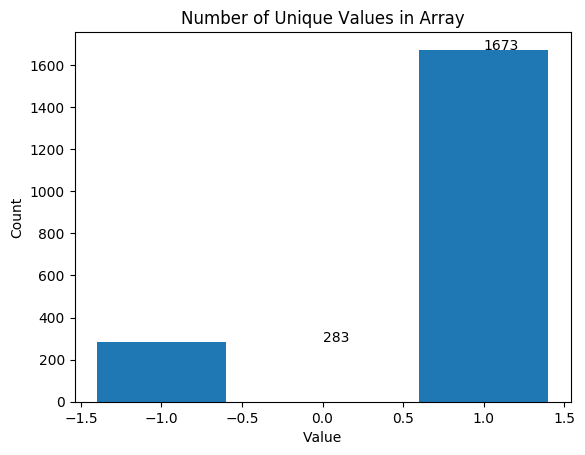

In [102]:
# 获取不同值的数量
unique, counts = np.unique(y_pred, return_counts=True)

# 绘制柱状图
plt.bar(unique, counts)
# 在每个柱子上方添加文本标签
for i, val in enumerate(counts):
    plt.text(i, val, str(val))
plt.title("Number of Unique Values in Array")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()


---------------------

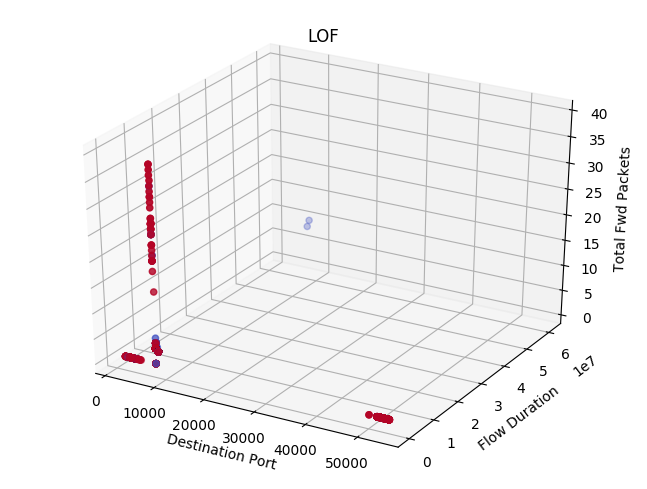

<Figure size 640x480 with 0 Axes>

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from mpl_toolkits.mplot3d import Axes3D
# 读取数据集
#data = pd.read_csv('data.csv')

# 提取数据集中的特征列
X_Bot_rows_LOF = Bot_rows.loc[:,Bot_rows.columns != " Label"]
# 训练LOF模型
clf = LocalOutlierFactor(n_neighbors=20,algorithm='auto',contamination=0.1,n_jobs=-1,p=2)
y_pred = clf.fit_predict(X_Bot_rows_LOF)

# 可视化结果
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(X_Bot_rows_LOF[' Destination Port'], X_Bot_rows_LOF[' Flow Duration'], X_Bot_rows_LOF[' Total Fwd Packets'], c=y_pred, cmap='coolwarm')

# 设置坐标轴标签
ax.set_xlabel('Destination Port')
ax.set_ylabel('Flow Duration')
ax.set_zlabel('Total Fwd Packets')

# 设置图形标题
plt.title("LOF")
# 显示图形
plt.show()
plt.savefig('种类数据筛选/LOF-0-3.jpg')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from mpl_toolkits.mplot3d import Axes3D
# 读取数据集
#data = pd.read_csv('data.csv')

# 提取数据集中的特征列
X_Bot_rows_LOF = Bot_rows.loc[:,Bot_rows.columns != " Label"]
# 训练LOF模型
clf = LocalOutlierFactor(n_neighbors=20,algorithm='auto',contamination=0.1,n_jobs=-1,p=2)
y_pred = clf.fit_predict(X_Bot_rows_LOF)

# 可视化结果
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax1.scatter(X_Bot_rows_LOF[' Idle Std'], X_Bot_rows_LOF[' Idle Max'], X_Bot_rows_LOF[' Idle Min'], c=y_pred, cmap='coolwarm')

# 设置坐标轴标签

ax1.set_xlabel('Idle Std')
ax1.set_ylabel('Idle Max')
ax1.set_zlabel('Idle Min')
# 设置图形标题
plt.title("LOF")
# 显示图形
plt.show()
#plt.savefig('种类数据筛选/LOF-4-7.png')

In [106]:
y_pred
#统计数组分类
from collections import Counter
counts = Counter(y_pred)
# 输出每个分类及其对应的数量
for Class, count in counts.items():
    print(Class, count)  

-1 196
1 1760


In [107]:
y_pred

array([-1, -1,  1, ..., -1,  1,  1])

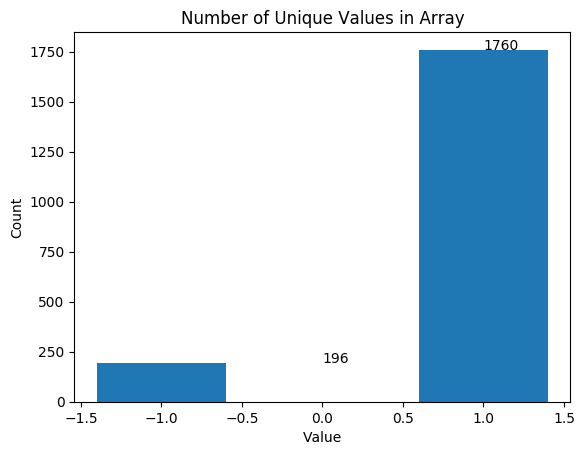

In [108]:
# 获取不同值的数量
unique, counts = np.unique(y_pred, return_counts=True)

# 绘制柱状图
plt.bar(unique, counts)
# 在每个柱子上方添加文本标签
for i, val in enumerate(counts):
    plt.text(i, val, str(val))
plt.title("Number of Unique Values in Array")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()


In [109]:
#数据筛选
Bot_rows_clean = Bot_rows[y_pred == 1] 

In [110]:
Bot_rows_clean.shape

(1760, 79)

举例的LOF

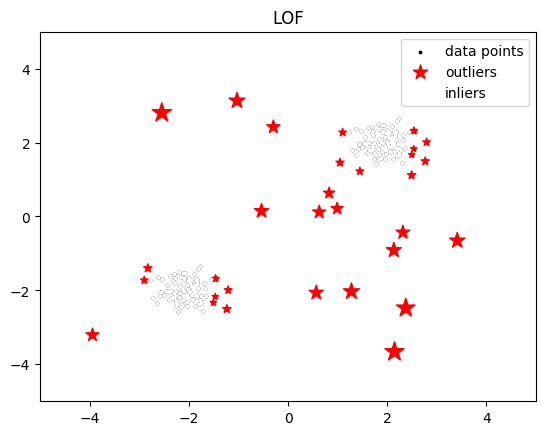

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# 生成示例数据集
X_LOF = 0.3 * np.random.randn(100, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X_LOF = np.r_[X_LOF + 2, X_LOF - 2, X_outliers]

# 训练LOF模型
clf_LOF = LocalOutlierFactor(n_neighbors=20)
y_pred = clf_LOF.fit_predict(X_LOF)

# 可视化结果
plt.title("LOF")
plt.scatter(X_LOF[:, 0], X_LOF[:, 1], color='k', s=3., label='data points')

# 用不同颜色标记异常点和正常点
radius = (clf_LOF.kneighbors(X_LOF, n_neighbors=20)[0].max(axis=1))
plt.scatter(X_LOF[y_pred == -1, 0], X_LOF[y_pred == -1, 1], color='r', s=50*radius[y_pred == -1], marker='*', label='outliers')
plt.scatter(X_LOF[y_pred == 1, 0], X_LOF[y_pred == 1, 1], color='w', s=3., label='inliers')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend()
plt.show()


**SVM异常值**

In [ ]:
##算法的思路非常简单，就是寻找一个超平面将样本中的正例圈出来，预测就是用这个超平面做决策，在圈内的样本就认为是正样本

In [67]:
co = Bot_rows.groupby(' Label').size()
co

 Label
14    1956
dtype: int64

In [111]:
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[' Label'] = le.fit_transform(df[' Label']).astype(np.int64)
'''
from sklearn.svm import OneClassSVM # 单分类
from numpy import where

from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [116]:
# 合并多列数据为一个特征向量
X = Bot_rows.values

In [117]:
len(X)

1956

In [118]:
# 定义异常检测器
#kernel：核函数（一般使用高斯核）
#nu：设定训练误差(0, 1]，表示异常点比例，默认值为0.5
#class sklearn.svm.OneClassSVM(kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, tol=0.001, nu=0.5, shrinking=True, cache_size=200, verbose=False,max_iter=-1, random_state=None)
clf = OneClassSVM(nu=0.1, kernel='linear', gamma=0.1)
clf1 = OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)


In [119]:
# 训练模型
clf.fit(X)

OneClassSVM(gamma=0.1, kernel='linear', nu=0.1)

In [120]:
# 训练模型
clf1.fit(Bot_rows)

OneClassSVM(gamma=0.1, nu=0.1)

In [125]:
# 预测数据的标签
y_pred_1 = clf.predict(Bot_rows)

In [128]:
y_pred_1
#统计数组分类
from collections import Counter
counts = Counter(y_pred_1)
# 输出每个分类及其对应的数量
for Class, count in counts.items():
    print(Class, count)  

1 1760
-1 196


In [127]:
# 过滤异常值索引
outlier_index = where(y_pred_1 == -1) 

# 过滤异常值
outlier_values = df.iloc[outlier_index]

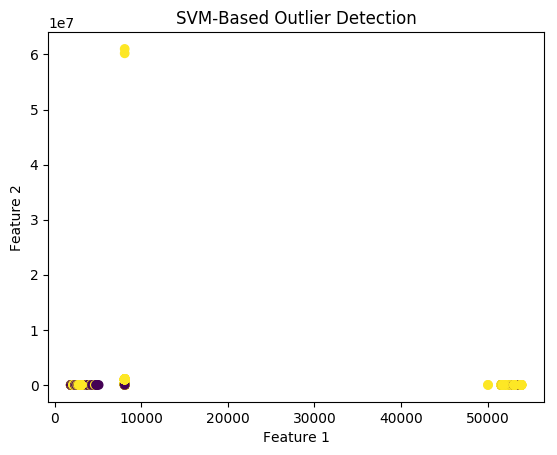

In [129]:
X_svm_1 = Bot_rows.iloc[:, :-1].values
Y_svm_1 = Bot_rows.iloc[:, -1].values

plt.scatter(X_svm_1[:, 0], X_svm_1[:, 1], c=y_pred_1)
plt.title('SVM-Based Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


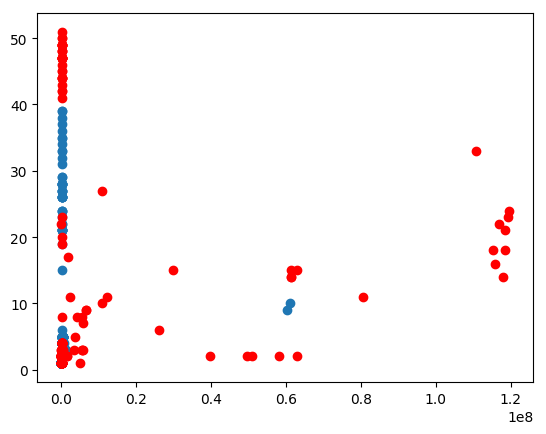

In [134]:
# 可视化输出
plt.scatter(Bot_rows[' Flow Duration'], Bot_rows[' Total Fwd Packets'])
plt.scatter(outlier_values[' Flow Duration'], outlier_values[' Total Fwd Packets'], c = "r")
plt.show
plt.savefig('种类数据筛选/SVM_Bot.png')

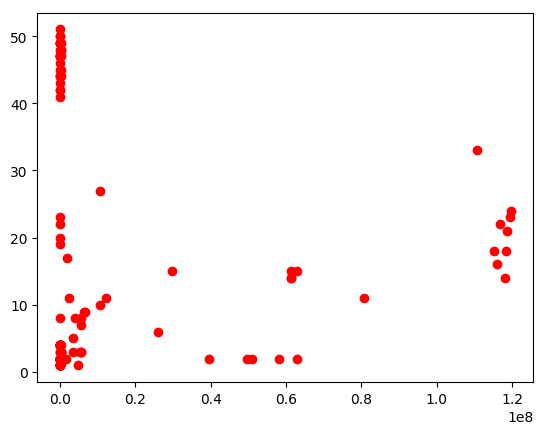

In [131]:
plt.scatter(outlier_values[' Flow Duration'], outlier_values[' Total Fwd Packets'], c = "r")

In [135]:
# 预测数据的标签
y_pred = clf.predict(X)

In [136]:
y_pred
#统计数组分类
from collections import Counter
counts = Counter(y_pred)
# 输出每个分类及其对应的数量
for Class, count in counts.items():
    print(Class, count)  

1 1760
-1 196


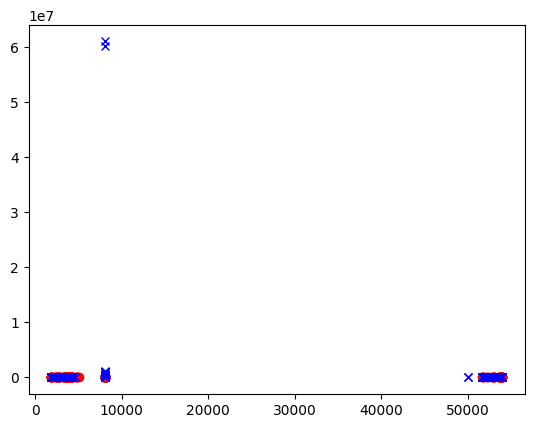

In [141]:
# inliers are labeled 1 , outliers are labeled -1
normal = X[y_pred == 1]
abnormal = X[y_pred == -1]

plt.plot(abnormal[:, 0], abnormal[:, 1], 'ro')
plt.plot(normal[:, 0], normal[:, 1], 'bx')


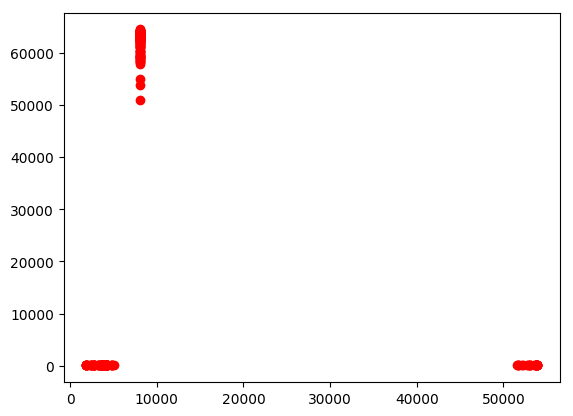

In [138]:
plt.plot(abnormal[:, 0], abnormal[:, 1], 'ro')

In [142]:
#直接生成数据
Bot_rows_clean_svm = Bot_rows[y_pred == 1] 

In [143]:
Bot_rows_clean_svm.shape

(1760, 79)

In [144]:
# 查看数据种类
ydata1_1 = pd.DataFrame(y_pred)
print(ydata1_1[0].unique())

[ 1 -1]


In [145]:
# 删除异常值
Bot_rows_11 = Bot_rows.iloc[y_pred == 1, :]

# 打印结果
print("原始数据集大小：", len(y_pred))
print("异常数据数量：", len(y_pred[y_pred == -1]))
print("处理后数据集大小：", Bot_rows_11.shape)

原始数据集大小： 1956
异常数据数量： 196
处理后数据集大小： (1760, 79)


In [ ]:
counts = Bot_rows_11.groupby(' Label').size()
counts

In [ ]:
########################################## 网络搜索
# 指定列名称和目标字符串
column_name = ' Label'
#Bot_string = 'Bot'
# 选出包含目标字符串的所有行
#Bot_rows = df[df[column_name].str.contains(Bot_string)]
Bot_rows = df[df.iloc[:, -1].astype(str).str.contains('14')]

**SSH-Patator**

In [ ]:
# 指定列名称和目标字符串
column_name = ' Label'
#Bot_string = 'Bot'
# 选出包含目标字符串的所有行
#Bot_rows = df[df[column_name].str.contains(Bot_string)]
SSH_Patator_rows = df[df.iloc[:, -1].astype(str).str.contains('9')]

In [ ]:
SSH_Patator_rows.shape

随机抽

In [10]:
df_sample = df.sample(n=100)

In [11]:
X_svm = df_sample.loc[:,df.columns != " Label"]
Y_svm = df_sample.loc[:,df.columns == " Label"]

In [12]:
svr = svm.SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 4], 'gamma':[0.125, 0.25, 0.5 ,1, 2, 4]}
clf2 = GridSearchCV(svr, parameters, scoring='f1')
clf2.fit(X_svm, Y_svm)
print('The parameters of the best model are: ')
print(clf2.best_params_)

    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 243, in _score
    **self._kwargs)
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 1074, in f1_score
    zero_division=zero_division)
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 1202, in fbeta_score
    zero_division=zero_division)
 

The parameters of the best model are: 
{'C': 1, 'gamma': 0.125, 'kernel': 'linear'}


In [14]:
df_test=df.sample(n=500)

In [15]:
df_test=df_test.drop(columns=[' Label'])

In [17]:
y_pred_2 = clf2.predict(df_test)

In [18]:
y_pred_2

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 5, 0, 5, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       5, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 5, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 5, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 2, 5, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 5,

In [20]:
print("Score:", clf2.score(X_svm,Y_svm))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

**Isolation Forest**

In [146]:
# 指定列名称和目标字符串
column_name = ' Label'
#Bot_string = 'Bot'
# 选出包含目标字符串的所有行
#Bot_rows = df[df[column_name].str.contains(Bot_string)]
SSH_Patator_rows = df[df.iloc[:, -1].astype(str).str.contains('9')]

In [147]:
SSH_Patator_rows.shape

(5897, 79)

In [171]:
X_iforest = SSH_Patator_rows.loc[:,SSH_Patator_rows.columns != " Label"]

In [223]:
# 加载模型所需要的的包
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


#构建模型 ,n_estimators=100 ,构建100颗树
model = IsolationForest(n_estimators=100, 
                      max_samples='auto', 
                      contamination=float(0.1),
                      max_features=1.0)
# 训练模型
model.fit(X_iforest)
#predict()方法获取每个样本的异常得分，并将其保存到原数据集中：
# 预测 decision_function 可以得出 异常评分
SSH_Patator_rows['scores']  = model.decision_function(X_iforest)

#  predict() 函数 可以得到模型是否异常的判断，-1为异常，1为正常
#SSH_Patator_rows['anomaly'] = model.predict(X_iforest)
y_pred = model.predict(X_iforest)
#scores_pred = model.decision_function(X_iforest)




/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


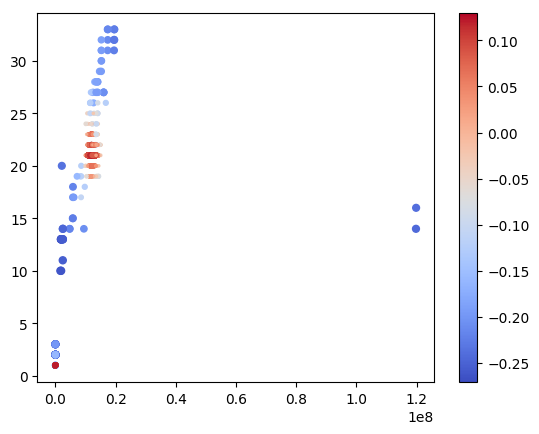

<Figure size 640x480 with 0 Axes>

In [216]:
plt.scatter(SSH_Patator_rows.iloc[:, 1], SSH_Patator_rows.iloc[:, 2], s=100*np.abs(SSH_Patator_rows['scores']), c=SSH_Patator_rows['scores'], cmap='coolwarm')
plt.colorbar()
plt.show()
plt.savefig('种类数据筛选/iForest_1.png')


In [217]:
abs_SSH_scores = np.abs(SSH_Patator_rows['scores'])

In [218]:
abs_SSH_scores 


1852702    0.184633
1852703    0.213458
1852764    0.219020
1852765    0.201542
1852766    0.225068
             ...   
2136245    0.049188
2136249    0.024308
2136250    0.022133
2136375    0.017532
2136378    0.020052
Name: scores, Length: 5897, dtype: float64

In [211]:
abs_SSH_scores

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,scores
1857673,22,1904571,13,11,1128,2009,640,0,86.769231,183.298552,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.271115
1857907,22,1884425,13,11,1128,2009,640,0,86.769231,183.298552,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.269032
1857678,22,1937542,13,11,1128,2009,640,0,86.769231,183.298552,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.265862
1857977,22,1688206,10,10,1128,2009,640,0,112.800000,203.802083,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.262234
1857930,22,1888077,10,11,1128,2009,640,0,112.800000,203.802083,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.261905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119887,22,11608626,24,32,2024,2745,640,0,84.333333,134.714728,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.000330
1896339,22,14023725,23,32,2008,2745,640,0,87.304348,136.339961,...,0.0,0.0,0,0,0.0,0.0,0,0,9,0.000265
1877304,22,11937456,25,32,2008,2745,640,0,80.320000,132.755012,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.000242
1895817,22,12851866,19,31,2008,2745,640,0,105.684210,143.767193,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.000058


In [193]:
sorted_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,scores
2094986,22,13784097,23,32,2008,2745,640,0,87.304348,136.339961,...,0.0,0.0,0,0,0.0,0.0,0,0,9,0.000039
1895817,22,12851866,19,31,2008,2745,640,0,105.684210,143.767193,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.000058
1877304,22,11937456,25,32,2008,2745,640,0,80.320000,132.755012,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.000242
1896339,22,14023725,23,32,2008,2745,640,0,87.304348,136.339961,...,0.0,0.0,0,0,0.0,0.0,0,0,9,0.000265
2119887,22,11608626,24,32,2024,2745,640,0,84.333333,134.714728,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.000330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857930,22,1888077,10,11,1128,2009,640,0,112.800000,203.802083,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.261905
1857977,22,1688206,10,10,1128,2009,640,0,112.800000,203.802083,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.262234
1857678,22,1937542,13,11,1128,2009,640,0,86.769231,183.298552,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.265862
1857907,22,1884425,13,11,1128,2009,640,0,86.769231,183.298552,...,0.0,0.0,0,0,0.0,0.0,0,0,9,-0.269032


In [221]:
threshold = -0.1
outliers = SSH_Patator_rows[SSH_Patator_rows['scores'] < threshold]
SSH_Patator_rows_clearn_ifor = SSH_Patator_rows[SSH_Patator_rows['scores'] >= threshold]


In [222]:
SSH_Patator_rows_clearn_ifor.shape

(5728, 80)

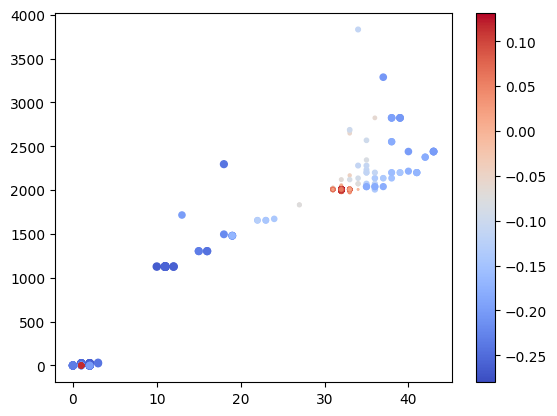

In [228]:
plt.scatter(SSH_Patator_rows.iloc[:, 3], SSH_Patator_rows.iloc[:, 4], s=100*np.abs(SSH_Patator_rows['scores']), c=SSH_Patator_rows['scores'], cmap='coolwarm')
plt.colorbar()
plt.show()


In [224]:
y_pred

array([-1, -1, -1, ...,  1,  1,  1])

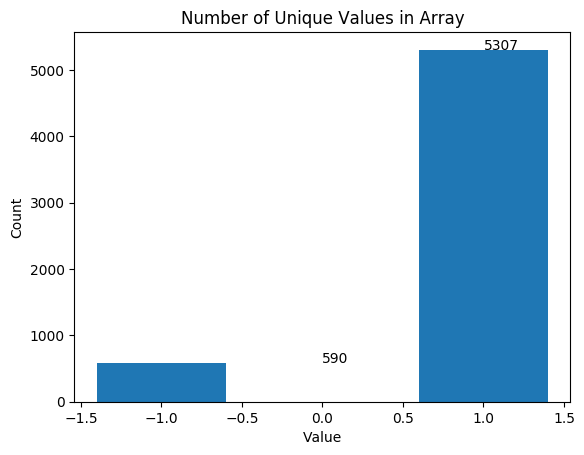

In [225]:
# 获取不同值的数量
unique, counts = np.unique(y_pred, return_counts=True)

# 绘制柱状图
plt.bar(unique, counts)
# 在每个柱子上方添加文本标签
for i, val in enumerate(counts):
    plt.text(i, val, str(val))
plt.title("Number of Unique Values in Array")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()


TypeError: '(slice(None, None, None), 0)' is an invalid key

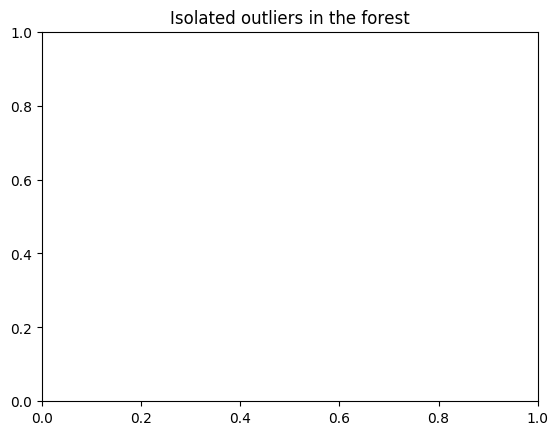

In [156]:
# 绘制结果
plt.title("Isolated outliers in the forest")
plt.scatter(X_iforest[:, 0], X_iforest[:, 1], color='k', s=3., label='数据点')
plt.scatter(X_iforest[y_pred == -1, 0], X_iforest[y_pred == -1, 1], color='r', s=30., label='离群点')
plt.legend()
plt.show()

In [ ]:

SSH_Patator_rows_clearn = SSH_Patator_rows[SSH_Patator_rows.iloc[:,-1] != -1]

In [ ]:
SSH_Patator_rows_clearn.shape

In [ ]:
SSH_Patator_rows_clearn['scores']